In [3]:
gscp('rwc - WGS vs targeted seq.ipynb', glue('{WORKSPACE_BUCKET}/rcorty/'))

Warning message in system(command = text, intern = TRUE):
“running command 'gsutil -u $GOOGLE_PROJECT cp rwc - WGS vs targeted seq.ipynb gs://fc-secure-95fec9d6-9173-477a-822e-cad4b97c8f0d/rcorty/' had status 1”


character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

# setup

In [1]:
#R.version

In [2]:
library(broom)
library(tidyverse)
library(glue)
library(CortyKit2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
gsls(glue('{WORKSPACE_BUCKET}/rcorty'))

all results of gsutil ls start with gs://fc-secure-95fec9d6-9173-477a-822e-cad4b97c8f0d/rcorty/



[1] "AGD250kcohortshiftedsampledates.csv"                     
 [2] "AGD_March_2025_SampleIDMap.csv"                          
 [3] "SRSF1.bed"                                               
 [4] "TERT.bed"                                                
 [5] "WGS_DTS_chip_calls_joined_by_variant.tsv"                
 [6] "chip_calls_byperson_DP_15p_AD2_2p_bs.tsv"                
 [7] "chip_calls_byperson_DP_15p_AD2_2p_bs_35k_cohort.tsv"     
 [8] "chip_calls_byperson_DP_15p_AD2_2p_os.tsv"                
 [9] "chip_calls_byperson_DP_15p_AD2_3p_bs.tsv"                
[10] "chip_calls_byperson_DP_15p_AD2_3p_os.tsv"                
[11] "chip_calls_byperson_DP_15p_AD2_4p_bs.tsv"                
[12] "chip_calls_byperson_DP_15p_AD2_4p_os.tsv"                
[13] "chip_calls_byperson_DP_15p_AD2_5p_bs.tsv"                
[14] "chip_calls_byperson_DP_15p_AD2_5p_os.tsv"                
[15] "chip_vars_DP_15p_AD2_2p_bs.tsv"                          
[16] "chip_vars_DP_15p_AD2_2p_os.tsv"                          
[17] "chip_vars_DP_15p_AD2_3p_bs.tsv"                          
[18] "chip_vars_DP_15p_AD2_3p_os.tsv"                          
[19] "chip_vars_DP_15p_AD2_4p_bs.tsv"                          
[20] "chip_vars_DP_15p_AD2_4p_os.tsv"                          
[21] "chip_vars_DP_15p_AD2_5p_bs.tsv"                          
[22] "chip_vars_DP_15p_AD2_5p_os.tsv"                          
[23] "demog_of_agd.csv"                                        
[24] "targeted_sequencing_biovu_rad_mtp_kidney_yp_03182025.tsv"
[25] "wgs_CHIP_is_spec_but_not_sens.ipynb"                     
[26] "score_files/"

In [4]:
# gscp('gs://fc-secure-95fec9d6-9173-477a-822e-cad4b97c8f0d/rcorty/AGD250kcohortshiftedsampledates.csv')

In [5]:
# gscp('gs://fc-secure-95fec9d6-9173-477a-822e-cad4b97c8f0d/rcorty/AGD_March_2025_SampleIDMap.csv')

In [6]:
# gscp('gs://fc-secure-95fec9d6-9173-477a-822e-cad4b97c8f0d/rcorty/demog_of_agd.csv')

In [7]:
# gscp('gs://fc-secure-95fec9d6-9173-477a-822e-cad4b97c8f0d/rcorty/targeted_sequencing*')

In [8]:
# read in all AGD data
'AGD250kcohortshiftedsampledates.csv' |>
read_csv(show_col_types = FALSE, 
         name_repair = ~str_replace_all(., ' ', '_')) |>
# filter(!is.na(Data_Available)) |>
mutate(biosample_date = mdy(SHIFTED_SAMPLE_DATE)) |>
select(-SHIFTED_SAMPLE_DATE, -Data_Available) |>
# join in sample ID
left_join(read_csv('AGD_March_2025_SampleIDMap.csv', show_col_types = FALSE)) |>
select(-OUTPUT_FOLDER_ID) |>
# join in demographics
left_join(read_csv('demog_of_agd.csv', show_col_types = FALSE)) |>
# filtering join for DTS data
semi_join(read_tsv('targeted_sequencing_biovu_rad_mtp_kidney_yp_03182025.tsv', show_col_types = FALSE)) |>
mutate(age_at_biosample = years_between(birth_date, biosample_date)) |>
glimpse() ->
cohort_dts_wgs

Joining with `by = join_by(GRID)`
Joining with `by = join_by(GRID)`
Joining with `by = join_by(GRID)`


Rows: 9,925
Columns: 7
$ GRID             <chr> "R266326281", "R291706619", "R269032555", "R220168678…
$ biosample_date   <date> 2007-04-15, 2007-01-03, 2015-04-24, 2010-06-05, 2010…
$ SAMPLE_ID        <dbl> 100118647, 100046382, 100248046, 100113980, 100242018…
$ person_id        <dbl> 410132, 2793542, 1628809, 1298642, 1723942, 1420199, …
$ birth_date       <dttm> 1943-10-27, 1948-03-13, 1950-02-19, 1940-04-27, 1936…
$ gender           <chr> "M", "M", "F", "M", "F", "F", "M", "M", "M", "M", "F"…
$ age_at_biosample <dbl> 63.46786, 58.81065, 65.17632, 70.10733, 74.77275, 58.…


In [9]:
cohort_dts_wgs$GRID |> lu()

[1] 9925

In [10]:
cohort_dts_wgs$person_id |> lu()

[1] 9925

In [11]:
cohort_dts_wgs |> distinct(person_id, biosample_date) |> glimpse()

Rows: 9,925
Columns: 2
$ person_id      <dbl> 410132, 2793542, 1628809, 1298642, 1723942, 1420199, 17…
$ biosample_date <date> 2007-04-15, 2007-01-03, 2015-04-24, 2010-06-05, 2010-1…


# read in and prep targeted seq calls

In [12]:
# gscp('gs://bicklab-main-storage/Data/BioVU/targeted_sequencing_results/targeted_sequencing_biovu_rad_mtp_kidney_yp_03182025.tsv')

In [18]:
'targeted_sequencing_biovu_rad_mtp_kidney_yp_03182025.tsv' |>
read_tsv(show_col_types = FALSE) |> 
filter(GRID != 'BLANK') |>
# count(GRID, sort = TRUE)
transmute(
    GRID,
    cohort,
    biosample_date = mdy(biovu_sample_date),
    chip_gene_dts = Gene.refGene,
    chip_mut_func_dts = Func.refGene,
    chip_mut_exofunc_dts = ExonicFunc.refGene,
    chip_mut_aachange_dts = NonsynOI,
    AF_dts = AF,
#     AD_dts = AD,
#     DP_dts = DP
) |>
glimpse() |>
# use only DTS data from same sample as WGS data
semi_join(cohort_dts_wgs, by = join_by(GRID, biosample_date)) |>
select(-cohort, -biosample_date) |>
# glimpse() |>
# remove duplicates
distinct(GRID, chip_gene_dts, chip_mut_aachange_dts, .keep_all = TRUE) |>
# only CHIP calls (don't need a row for everyone)
filter(!is.na(chip_gene_dts)) |>
glimpse() ->
chip_vars_dts

Rows: 13,027
Columns: 8
$ GRID                  <chr> "R221177023", "R238211457", "R202293796", "R2377…
$ cohort                <chr> "kidney", "kidney", "kidney", "kidney", "kidney"…
$ biosample_date        <date> 2016-12-27, 2007-03-21, 2009-08-04, 2009-01-24,…
$ chip_gene_dts         <chr> NA, NA, NA, NA, NA, NA, "DNMT3A", "DNMT3A", NA, …
$ chip_mut_func_dts     <chr> NA, NA, NA, NA, NA, NA, "exonic", "exonic", NA, …
$ chip_mut_exofunc_dts  <chr> NA, NA, NA, NA, NA, NA, "frameshift deletion", "…
$ chip_mut_aachange_dts <chr> NA, NA, NA, NA, NA, NA, "R767Gfs*14", "R767Gfs*1…
$ AF_dts                <dbl> NA, NA, NA, NA, NA, NA, 0.065, 0.065, NA, 0.020,…
Rows: 1,509
Columns: 6
$ GRID                  <chr> "R236850354", "R288271461", "R231178314", "R2126…
$ chip_gene_dts         <chr> "DNMT3A", "GNB1", "DNMT3A", "ASXL1", "DNMT3A", "…
$ chip_mut_func_dts     <chr> "exonic", "exonic", "splicing", "exonic", "exoni…
$ chip_mut_exofunc_dts  <chr> "frameshift deletion", "nonsynonymous SNV",

In [19]:
chip_vars_dts$GRID |> lu()

[1] 1255

In [20]:
mean(chip_vars_dts$GRID %in% cohort_dts_wgs$GRID)

[1] 1

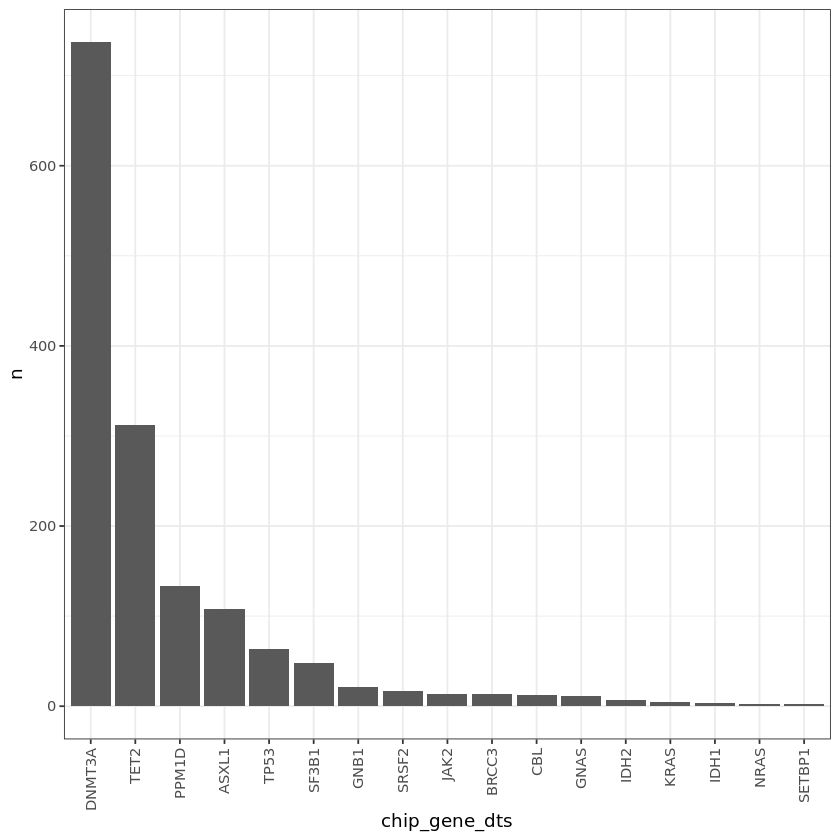

In [21]:
chip_vars_dts |>
count(chip_gene_dts, sort = TRUE) |>
mutate(chip_gene_dts = factor(chip_gene_dts, levels = chip_gene_dts)) |>
ggplot(mapping = aes(x = chip_gene_dts, y = n)) +
geom_bar(stat = 'identity') +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [22]:
ggsave('DTS_chip_genes_histogram.pdf', width = 7, height = 4)

# read in and prep WGS calls

In [20]:
# gscp(
#     'gs://fc-secure-95fec9d6-9173-477a-822e-cad4b97c8f0d/rcorty/chip_vars_DP_15p_AD2_2p_bs.tsv',
# )

In [33]:
'chip_vars_DP_15p_AD2_2p_bs.tsv' |>
read_tsv(show_col_types = FALSE) |>
transmute(
    SAMPLE_ID,
    chr = Chr,
    start = Start,
    end = End,
    chip_gene_wgs = Gene.refGene,
    chip_mut_func_wgs = Func.refGene,
    chip_mut_exofunc_wgs = ExonicFunc.refGene,
    chip_mut_aachange_wgs = NonsynOI,
    GT_wgs = GT,
    AF_wgs = AF,
    DP_wgs = DP,
    AD_1_wgs = AD_1,
    AD_2_wgs = AD_2,
    AD_3_wgs = AD_3,
    AD_4_wgs = AD_4,
    F1R2_1_wgs = F1R2_1, 
    F1R2_2_wgs = F1R2_2, 
    F1R2_3_wgs = F1R2_3, 
    F1R2_4_wgs = F1R2_4, 
    F2R1_1_wgs = F2R1_1, 
    F2R1_2_wgs = F2R1_2, 
    F2R1_3_wgs = F2R1_3, 
    F2R1_4_wgs = F2R1_4) |>
# filter to only GRIDs that also have DTS
inner_join(cohort_dts_wgs, by = 'SAMPLE_ID') |>
# some GRIDs were run through mutect twice -- keep only one
distinct(GRID, chip_gene_wgs, chip_mut_aachange_wgs, AF_wgs, .keep_all = TRUE) |>
# keep only needed columns
select(GRID, person_id, SAMPLE_ID,
       birth_date, gender, biosample_date, age_at_biosample,
       chr:F2R1_4_wgs) |>
glimpse() ->
chip_vars_wgs

Rows: 962
Columns: 29
$ GRID                  <chr> "R217582400", "R294922217", "R211228060", "R2379…
$ person_id             <dbl> 1184631, 1244311, 1303665, 1153140, 1022350, 131…
$ SAMPLE_ID             <dbl> 110018, 100204337, 100140949, 103045, 100226875,…
$ birth_date            <dttm> 1934-03-26, 1948-03-05, 1929-03-29, 1934-04-09,…
$ gender                <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F"…
$ biosample_date        <date> 2010-01-02, 2006-11-04, 2011-08-26, 2012-09-01,…
$ age_at_biosample      <dbl> 75.774833, 58.668273, 82.411565, 78.400504, 81.3…
$ chr                   <chr> "chr20", "chr2", "chr2", "chr20", "chr2", "chr2"…
$ start                 <dbl> 32437080, 25275081, 25234373, 32437183, 25247690…
$ end                   <dbl> 32437080, 25275081, 25234373, 32437183, 25247690…
$ chip_gene_wgs         <chr> "ASXL1", "DNMT3A", "DNMT3A", "ASXL1", "DNMT3A", …
$ chip_mut_func_wgs     <chr> "exonic", "exonic", "exonic", "exonic", "exonic"…
$ chip_mut_exofunc

In [35]:
chip_vars_wgs$GRID |> lu()

[1] 853

In [36]:
mean(chip_vars_wgs$GRID %in% cohort_dts_wgs$GRID)

[1] 1

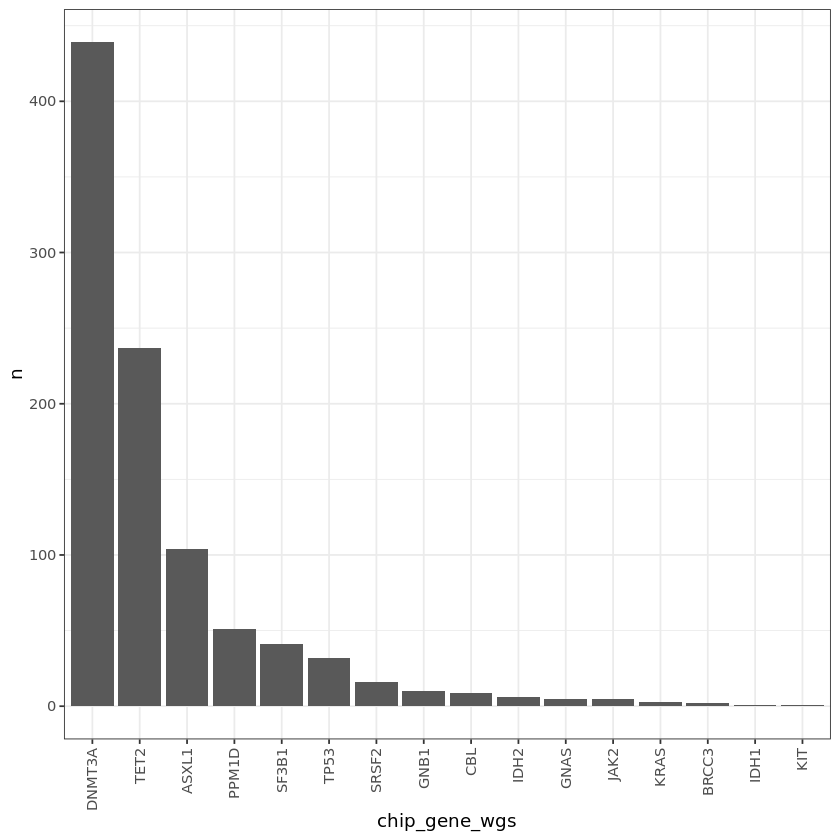

In [37]:
chip_vars_wgs |>
count(chip_gene_wgs, sort = TRUE) |>
mutate(chip_gene_wgs = factor(chip_gene_wgs, levels = chip_gene_wgs)) |>
ggplot(mapping = aes(x = chip_gene_wgs, y = n)) +
geom_bar(stat = 'identity') +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [38]:
ggsave('WGS_chip_genes_histogram.pdf', width = 7, height = 4)

# cohort basics

In [20]:
# size of study cohort?
nrow(cohort_dts_wgs)

[1] 9925

In [21]:
# how many have CHIP by gold standard?
nrow(chip_calls_dts |> distinct(GRID))

[1] 1255

In [22]:
# what % have CHIP?
round(100 * nrow(distinct(chip_calls_dts, GRID))/nrow(cohort_dts_wgs))

[1] 13

In [23]:
# how many have single CHIP vs multi-CHIP?
chip_calls_dts |>
filter(!is.na(chip_gene_dts)) |>
count(GRID) |>
count(n, name = 'num_chip_muts')

n,num_chip_muts
<int>,<int>
1,1059
2,156
3,27
4,10
5,1
6,2


# sens/spec/PPV/NPV by person -- deprecated

In [27]:
# glimpse(chip_calls_dts)

In [28]:
# glimpse(chip_calls_wgs)

In [27]:
# glimpse(chip_calls_dts)

Rows: 1,177
Columns: 6
$ GRID                  <chr> "R236850354", "R288271461", "R231178314", "R2740…
$ chip_gene_dts         <chr> "DNMT3A", "GNB1", "DNMT3A", "DNMT3A", "DNMT3A", …
$ chip_mut_func_dts     <chr> "exonic", "exonic", "splicing", "exonic", "exoni…
$ chip_mut_exofunc_dts  <chr> "frameshift deletion", "nonsynonymous SNV", ".",…
$ chip_mut_aachange_dts <chr> "R767Gfs*14", "K57E", NA, "L637P", "T257Mfs*59",…
$ AF_dts                <dbl> 0.065, 0.031, 0.439, 0.023, 0.048, 0.032, 0.020,…


In [25]:
# cohort_dts_wgs |>
# left_join(
#     chip_calls_dts |>
#     group_by(GRID) |>
#     summarise(AF_dts = max(AF_dts))
# ) |>
# left_join(
#     chip_calls_wgs |>
#     group_by(GRID) |>
#     summarise(AF_wgs = max(AF_wgs))
# ) |>
# glimpse() ->
# chip_calls_joined_byperson

Joining with `by = join_by(GRID)`
Joining with `by = join_by(GRID)`


Rows: 7,981
Columns: 9
$ GRID             <chr> "R269032555", "R242126835", "R268805840", "R222516063…
$ biosample_date   <date> 2015-04-24, 2010-11-11, 2008-04-07, 2007-11-14, 2010…
$ SAMPLE_ID        <dbl> 100248046, 100242018, 100059828, 100173774, 100219642…
$ person_id        <dbl> 1628809, 1723942, 1420199, 1727913, 2133852, 2254816,…
$ birth_date       <dttm> 1950-02-19, 1936-02-03, 1949-10-31, 1962-03-07, 1934…
$ gender           <chr> "F", "F", "F", "M", "M", "F", "F", "M", "M", "M", "F"…
$ age_at_biosample <dbl> 65.08544, 74.66849, 58.35407, 45.62679, 75.60629, 60.…
$ AF_dts           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ AF_wgs           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…


In [ ]:
# write_tsv(chip_calls_joined_byperson, 'chip_calls_dts_wgs')

In [30]:
# chip_calls_joined_byperson |>
# filter(is.na(AF_dts)) |>
# pull(AF_wgs) |>
# is.na() |> mean() |> print() ->
# wgs_spec

[1] 0.9643777


In [31]:
# chip_calls_joined_byperson |>
# filter(!is.na(AF_dts)) |>
# pull(AF_wgs) |>
# is_not_na() |> mean() |> print() ->
# wgs_sens

[1] 0.2552977


In [32]:
# chip_calls_joined_byperson |>
# filter(!is.na(AF_dts)) |>
# filter(AF_dts > 0.05) |>
# pull(AF_wgs) |>
# is_not_na() |> mean() |> print() ->
# wgs_sens_gt_05

[1] 0.4109589


In [38]:
# chip_calls_joined_byperson |>
# filter(!is.na(AF_dts)) |>
# filter(AF_dts > 0.1) |>
# pull(AF_wgs) |>
# is_not_na() |> mean() |> print() ->
# wgs_sens_gt_10

[1] 0.4830508


In [39]:
# chip_calls_joined_byperson |>
# filter(!is.na(AF_dts)) |>
# filter(AF_dts > 0.2) |>
# pull(AF_wgs) |>
# is_not_na() |> mean() |> print() ->
# wgs_sens_gt_20

[1] 0.3245614


In [40]:
# chip_calls_joined_byperson |>
# filter(!is.na(AF_dts)) |>
# filter(AF_dts > 0.3) |>
# pull(AF_wgs) |>
# is_not_na() |> mean() |> print() ->
# wgs_sens_gt_30

[1] 0.1607143


In [33]:
# chip_calls_joined_byperson |>
# filter(!is.na(AF_dts)) |>
# filter(between(AF_dts, 0.02, 0.05)) |>
# pull(AF_wgs) |>
# is_not_na() |>
# mean()

In [34]:
# chip_calls_joined_byperson |>
# filter(!is.na(AF_dts)) |>
# filter(between(AF_dts, 0.05, 0.1)) |>
# pull(AF_wgs) |>
# is_not_na() |>
# mean()

In [35]:
# chip_calls_joined_byperson |>
# filter(!is.na(AF_dts)) |>
# filter(between(AF_dts, 0.1, 0.2)) |>
# pull(AF_wgs) |>
# is_not_na() |>
# mean()

In [36]:
# chip_calls_joined_byperson |>
# filter(!is.na(AF_dts)) |>
# filter(between(AF_dts, 0.2, 0.3)) |>
# pull(AF_wgs) |>
# is_not_na() |>
# mean()

In [37]:
# chip_calls_joined_byperson |>
# filter(!is.na(AF_dts)) |>
# filter(between(AF_dts, 0.3, 1)) |>
# pull(AF_wgs) |>
# is_not_na() |>
# mean()

# A tibble: 4 × 2
  name                                    value
  <chr>                                   <dbl>
1 "specificity"                           0.964
2 "sensitivity for people\nwith CHIP"     0.255
3 "sensitivity for people\nwith AF > 5%"  0.411
4 "sensitivity for people\nwith AF > 10%" 0.483


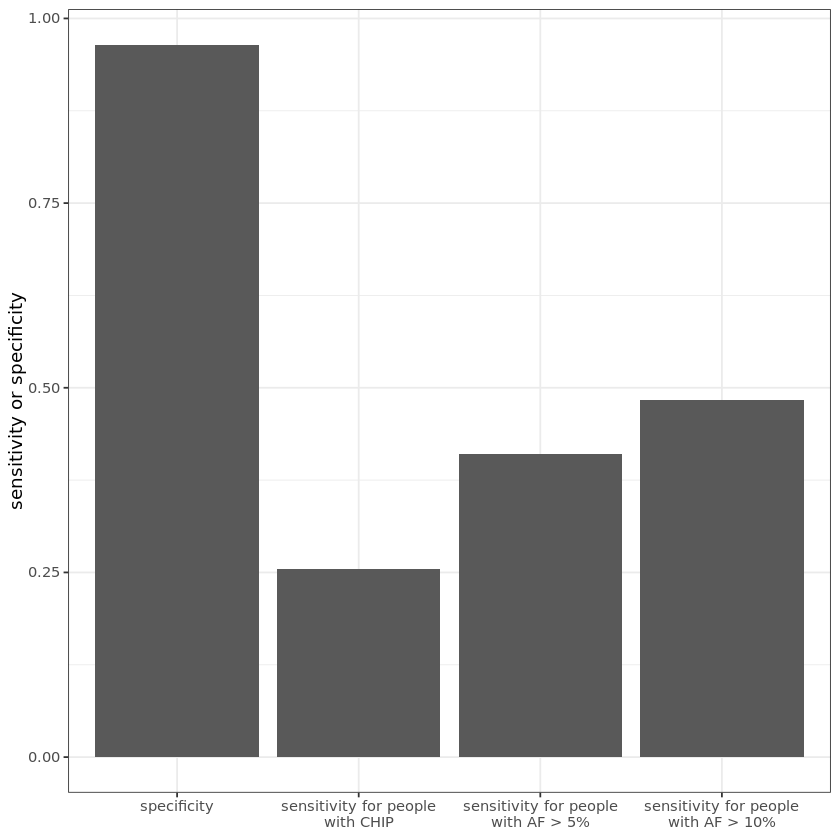

In [39]:
# tibble(
#     `specificity` = wgs_spec,
#     `sensitivity for people\nwith CHIP` = wgs_sens,
#     `sensitivity for people\nwith AF > 5%` = wgs_sens_gt_05,
#     `sensitivity for people\nwith AF > 10%` = wgs_sens_gt_10,
# #     `sensitivity for people\nwith AF > 20%` = wgs_sens_gt_20,
# #     `sensitivity for people\nwith AF > 30%` = wgs_sens_gt_30
# ) |>
# pivot_longer(cols = everything()) |>
# print() |>
# mutate(name = factor(name, levels = name)) |>
# ggplot(aes(x = name, y = value)) +
# geom_bar(stat = 'identity') +
# theme_bw() +
# labs(x = NULL, y = 'sensitivity or specificity')

In [40]:
# ggsave('wgs_sens_spec_byperson.pdf', height = 4, width = 6)

# sens/spec/PPV/NPV by variant

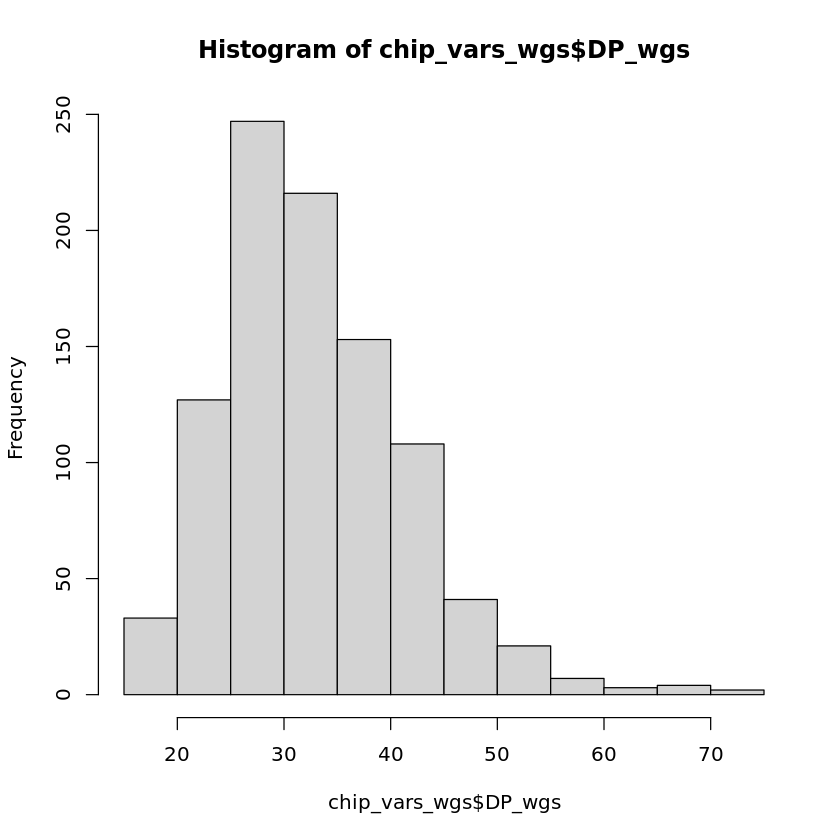

In [39]:
chip_vars_wgs$DP_wgs |> hist()

In [42]:
chip_vars_dts |>
full_join(chip_vars_wgs, 
          by = join_by(
              GRID, 
              chip_gene_dts == chip_gene_wgs,
              chip_mut_aachange_dts == chip_mut_aachange_wgs)) |>
# full_join(cohort_dts_wgs, by = 'GRID') |>
# select(
#     GRID,
#     person_id,
#     SAMPLE_ID,
#     birth_date, gender, age_at_biosample,
#     chip_gene = chip_gene_dts,
#     chip_mut_func = chip_mut_func_dts,
#     chip_mut_exofunc = chip_mut_exofunc_dts,
#     chip_mut_aachange = chip_mut_aachange_dts,
#     AF_dts,
#     AD1_wgs:DP_wgs
# ) |>
glimpse() ->
chip_calls_joined_byvariant

Rows: 2,045
Columns: 32
$ GRID                  <chr> "R236850354", "R288271461", "R231178314", "R2126…
$ chip_gene_dts         <chr> "DNMT3A", "GNB1", "DNMT3A", "ASXL1", "DNMT3A", "…
$ chip_mut_func_dts     <chr> "exonic", "exonic", "splicing", "exonic", "exoni…
$ chip_mut_exofunc_dts  <chr> "frameshift deletion", "nonsynonymous SNV", ".",…
$ chip_mut_aachange_dts <chr> "R767Gfs*14", "K57E", NA, "P808Lfs*10", "L637P",…
$ AF_dts                <dbl> 0.065, 0.031, 0.439, 0.264, 0.023, 0.048, 0.032,…
$ person_id             <dbl> 2321854, NA, NA, 1824488, NA, NA, NA, NA, 928126…
$ SAMPLE_ID             <dbl> 100184671, NA, NA, 100208003, NA, NA, NA, NA, 10…
$ birth_date            <dttm> 1935-08-26, NA, NA, 1947-06-20, NA, NA, NA, NA,…
$ gender                <chr> "F", NA, NA, "F", NA, NA, NA, NA, "M", "M", NA, …
$ biosample_date        <date> 2011-04-11, NA, NA, 2016-09-19, NA, NA, NA, NA,…
$ age_at_biosample      <dbl> 75.62698, NA, NA, 69.25309, NA, NA, NA, NA, 69.9…
$ chr           

In [43]:
write_tsv(
    chip_calls_joined_byvariant,
    'WGS_DTS_chip_calls_joined_by_variant.tsv'
)

In [44]:
gscp(
    'WGS_DTS_chip_calls_joined_by_variant.tsv',
    glue('{WORKSPACE_BUCKET}/rcorty')
)

character(0)

In [46]:
gsls(glue('{WORKSPACE_BUCKET}/rcorty'))

all results of gsutil ls start with gs://fc-secure-95fec9d6-9173-477a-822e-cad4b97c8f0d/rcorty/



[1] "AGD250kcohortshiftedsampledates.csv"                     
 [2] "AGD_March_2025_SampleIDMap.csv"                          
 [3] "SRSF1.bed"                                               
 [4] "TERT.bed"                                                
 [5] "WGS_DTS_chip_calls_joined_by_variant.tsv"                
 [6] "agd_baseline_data_250k.csv"                              
 [7] "chip_calls_byperson_DP_15p_AD2_2p_bs.tsv"                
 [8] "chip_calls_byperson_DP_15p_AD2_2p_bs_35k_cohort.tsv"     
 [9] "chip_calls_byperson_DP_15p_AD2_2p_os.tsv"                
[10] "chip_calls_byperson_DP_15p_AD2_3p_bs.tsv"                
[11] "chip_calls_byperson_DP_15p_AD2_3p_os.tsv"                
[12] "chip_calls_byperson_DP_15p_AD2_4p_bs.tsv"                
[13] "chip_calls_byperson_DP_15p_AD2_4p_os.tsv"                
[14] "chip_calls_byperson_DP_15p_AD2_5p_bs.tsv"                
[15] "chip_calls_byperson_DP_15p_AD2_5p_os.tsv"                
[16] "chip_vars_DP_15p_AD2_2p_bs.tsv"                          
[17] "chip_vars_DP_15p_AD2_2p_os.tsv"                          
[18] "chip_vars_DP_15p_AD2_3p_bs.tsv"                          
[19] "chip_vars_DP_15p_AD2_3p_os.tsv"                          
[20] "chip_vars_DP_15p_AD2_4p_bs.tsv"                          
[21] "chip_vars_DP_15p_AD2_4p_os.tsv"                          
[22] "chip_vars_DP_15p_AD2_5p_bs.tsv"                          
[23] "chip_vars_DP_15p_AD2_5p_os.tsv"                          
[24] "demog_of_agd.csv"                                        
[25] "putative_chip_vars_nofilters.RDS"                        
[26] "targeted_sequencing_biovu_rad_mtp_kidney_yp_03182025.tsv"
[27] "wgs_CHIP_is_spec_but_not_sens.ipynb"                     
[28] "score_files/"

In [28]:
chip_calls_joined_byvariant = read_tsv('WGS_DTS_chip_calls_joined_by_variant.tsv')

Rows: 10303 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (8): GRID, chip_gene_dts, chip_mut_func_dts, chip_mut_exofunc_dts, chip...
dbl  (5): AF_dts, AF_wgs, SAMPLE_ID, person_id, age_at_biosample
dttm (1): birth_date
date (1): biosample_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## look into false positives

In [25]:
chip_calls_joined_byvariant |>
filter(is.na(AF_dts)) |>
pull(AF_wgs) |>
is_not_na() |> mean() |> print() ->
wgs_fpr

[1] 0.06095065


In [26]:
chip_calls_joined_byvariant |>
filter(is.na(AF_dts), !is.na(AF_wgs)) |>
pull(AF_wgs) ->
false_pos_AF_wgs

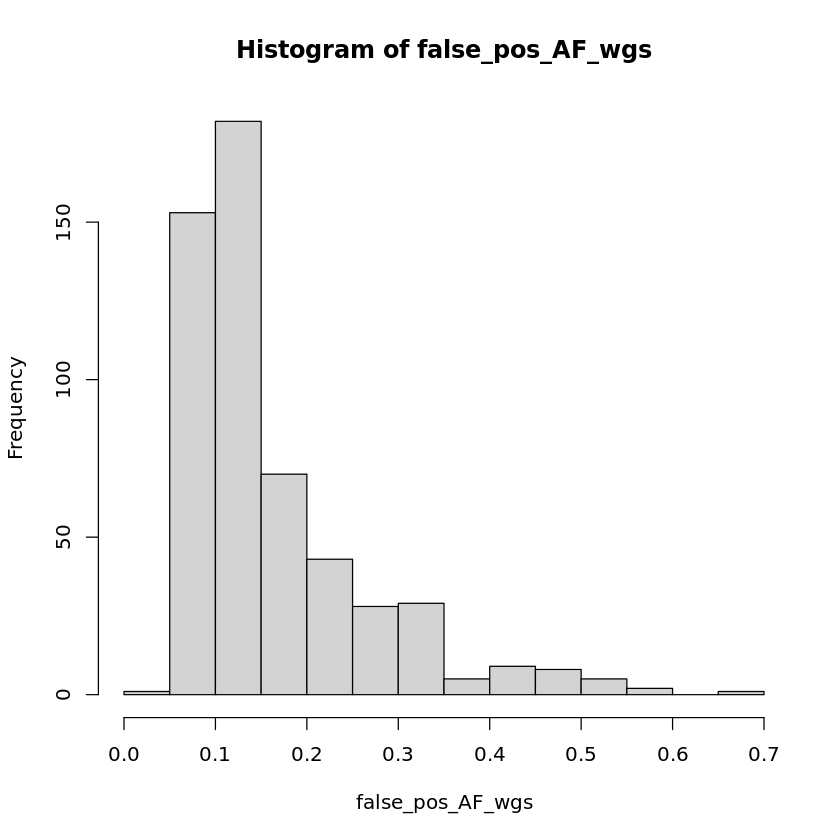

In [27]:
hist(false_pos_AF_wgs)

In [28]:
dput(false_pos_AF_wgs)

c(0.152, 0.103, 0.113, 0.102, 0.111, 0.077, 0.13, 0.162, 0.147, 
0.114, 0.194, 0.1, 0.103, 0.137, 0.125, 0.104, 0.119, 0.075, 
0.091, 0.343, 0.107, 0.06, 0.673, 0.094, 0.184, 0.109, 0.111, 
0.292, 0.347, 0.113, 0.125, 0.105, 0.163, 0.147, 0.088, 0.115, 
0.479, 0.103, 0.22, 0.165, 0.118, 0.069, 0.148, 0.506, 0.179, 
0.088, 0.07, 0.1, 0.133, 0.045, 0.259, 0.086, 0.167, 0.127, 0.217, 
0.08, 0.097, 0.082, 0.138, 0.109, 0.068, 0.093, 0.09, 0.119, 
0.175, 0.115, 0.193, 0.131, 0.12, 0.285, 0.442, 0.125, 0.116, 
0.18, 0.172, 0.125, 0.176, 0.322, 0.1, 0.319, 0.095, 0.241, 0.263, 
0.228, 0.207, 0.218, 0.135, 0.235, 0.13, 0.099, 0.18, 0.072, 
0.106, 0.216, 0.302, 0.21, 0.336, 0.083, 0.118, 0.086, 0.139, 
0.116, 0.075, 0.15, 0.143, 0.113, 0.072, 0.138, 0.112, 0.187, 
0.133, 0.087, 0.237, 0.128, 0.13, 0.104, 0.115, 0.143, 0.096, 
0.097, 0.118, 0.091, 0.229, 0.274, 0.241, 0.206, 0.206, 0.219, 
0.125, 0.111, 0.13, 0.291, 0.103, 0.095, 0.101, 0.395, 0.094, 
0.479, 0.115, 0.199, 0.054, 0.138, 0.111, 0.

In [29]:
write_tsv(
    chip_calls_joined_byvariant,
    'WGS_DTS_chip_calls_joined_by_variant.tsv'
)

In [31]:
gscp(
    'WGS_DTS_chip_calls_joined_by_variant.tsv',
    glue('{WORKSPACE_BUCKET}/rcorty')
)

character(0)

In [64]:
gsls(glue('{wb}/rcorty'))

[1] "gs://fc-secure-ef139649-d520-4a71-b534-d9c22b970743/rcorty/"                                        
[2] "gs://fc-secure-ef139649-d520-4a71-b534-d9c22b970743/rcorty/SRSF1.bed"                               
[3] "gs://fc-secure-ef139649-d520-4a71-b534-d9c22b970743/rcorty/TERT.bed"                                
[4] "gs://fc-secure-ef139649-d520-4a71-b534-d9c22b970743/rcorty/WGS_DTS_chip_calls_joined_by_variant.tsv"
[5] "gs://fc-secure-ef139649-d520-4a71-b534-d9c22b970743/rcorty/wgs_CHIP_is_spec_but_not_sens.ipynb"     
[6] "gs://fc-secure-ef139649-d520-4a71-b534-d9c22b970743/rcorty/score_files/"

## sens and PPV overall

In [36]:
chip_calls_joined_byvariant |>
filter(is_not_na(AF_dts)) |>
nrow() |> print() ->
num_w_chip

[1] 1509


In [37]:
chip_calls_joined_byvariant |>
filter(is_not_na(AF_dts), is_not_na(AF_wgs)) |>
nrow() |> print() ->
num_w_chip_detected_by_wgs

[1] 426


In [38]:
# wgs sensitivity
num_w_chip_detected_by_wgs/num_w_chip

[1] 0.2823062

In [29]:
chip_calls_joined_byvariant |>
filter(is.na(AF_dts)) |>
nrow() |> print() ->
num_wo_chip

[1] 8794


In [30]:
chip_calls_joined_byvariant |>
filter(is.na(AF_dts), is.na(AF_wgs)) |>
nrow() |> print() ->
num_wo_chip_not_detected_by_wgs

[1] 8258


In [31]:
num_wo_chip_not_detected_by_wgs/num_wo_chip

[1] 0.9390494

In [39]:
chip_calls_joined_byvariant |>
filter(is_not_na(AF_wgs)) |>
nrow() |> print() ->
num_detected_by_wgs

[1] 962


In [40]:
# wgs ppv
num_w_chip_detected_by_wgs / num_detected_by_wgs

[1] 0.4428274

## sens and PPV by AF

In [46]:
# number of variants found by AF
chip_calls_joined_byvariant |>
filter(is_not_na(AF_dts) & AF_dts > 0.02) |>
mutate(AF_dts_range = cut(AF_dts, c(0.02, 0.05, 0.10, 0.2, 1))) |>
group_by(`Variant Allele Fraction` = AF_dts_range) |>
summarise(num_vars_found = sum(is_not_na(AF_wgs))) |>
print() ->
num_vars_by_af

# A tibble: 4 × 2
  `Variant Allele Fraction` num_vars_found
  <fct>                              <int>
1 (0.02,0.05]                           71
2 (0.05,0.1]                            93
3 (0.1,0.2]                            112
4 (0.2,1]                              149


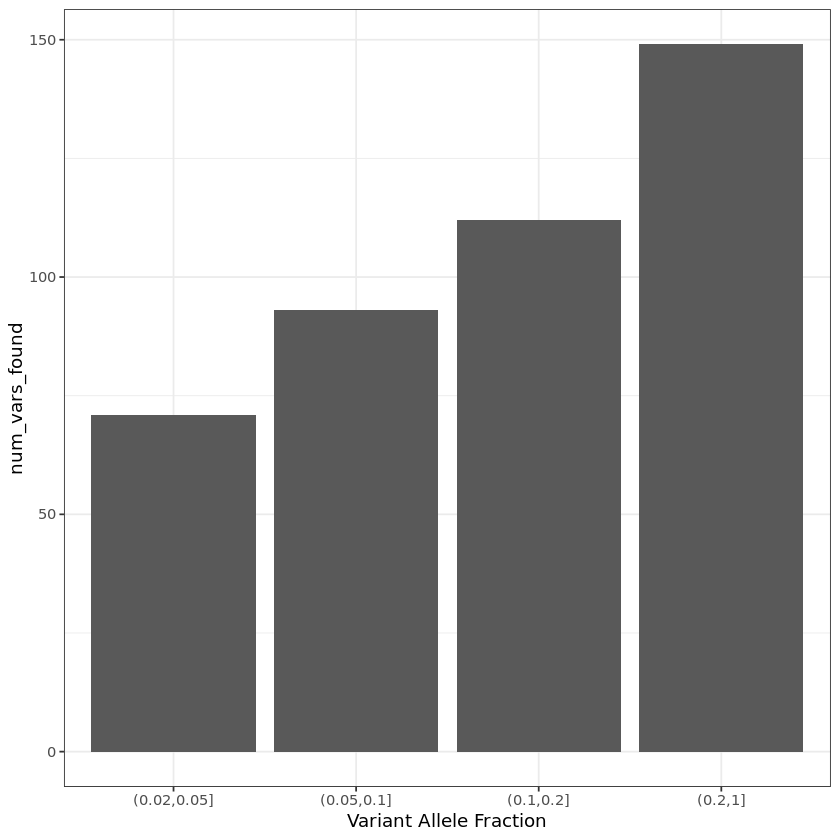

In [45]:
num_vars_by_af |>
ggplot(aes(x = `Variant Allele Fraction`, y = num_vars_found)) +
geom_bar(stat = 'identity') +
theme_bw()

In [47]:
chip_calls_joined_byvariant |>
filter(is_not_na(AF_dts) & AF_dts > 0.02) |>
mutate(AF_dts_range = cut(AF_dts, c(0.02, 0.05, 0.10, 0.2, 1))) |>
group_by(`Variant Allele Fraction` = AF_dts_range) |>
summarise(`WGS sensitivity` = mean(is_not_na(AF_wgs))) |>
print() ->
sens_by_af

# A tibble: 4 × 2
  `Variant Allele Fraction` `WGS sensitivity`
  <fct>                                 <dbl>
1 (0.02,0.05]                          0.0872
2 (0.05,0.1]                           0.318 
3 (0.1,0.2]                            0.671 
4 (0.2,1]                              0.861 


In [48]:
sens_by_af |>
ggplot(aes(x = `Variant Allele Fraction`, y = `WGS sensitivity`)) +
geom_bar(stat = 'identity') +
theme_bw() +
labs(tag = 'A', x = 'VAF by DTS') ->
p1

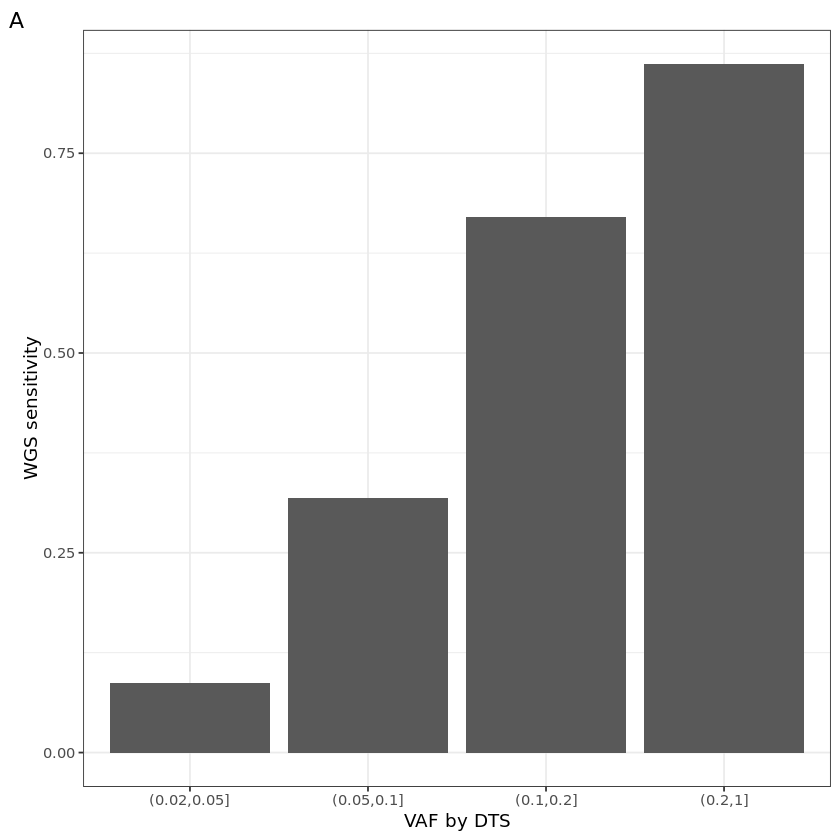

In [49]:
p1

In [48]:
ggsave('wgs_sens_spec_byvariant.pdf', height = 4, width = 6)

In [50]:
chip_calls_joined_byvariant |>
filter(is_not_na(AF_wgs)) |>
mutate(AF_wgs_range = cut(AF_wgs, c(0.02, 0.05, 0.10, 0.2, 1))) |>
group_by(AF_wgs_range) |>
summarise(PPV = mean(is_not_na(AF_dts))) |>
print() ->
ppv_by_af

# A tibble: 4 × 2
  AF_wgs_range   PPV
  <fct>        <dbl>
1 (0.02,0.05]  0    
2 (0.05,0.1]   0.257
3 (0.1,0.2]    0.439
4 (0.2,1]      0.575


In [ ]:
ppv_by_af |>
ggplot(aes(x = AF_wgs_range, y = PPV)) +
geom_bar(stat = 'identity') +
theme_bw() +
labs(tag = 'B', x = 'VAF by WGS', fill = NULL) ->
p2

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


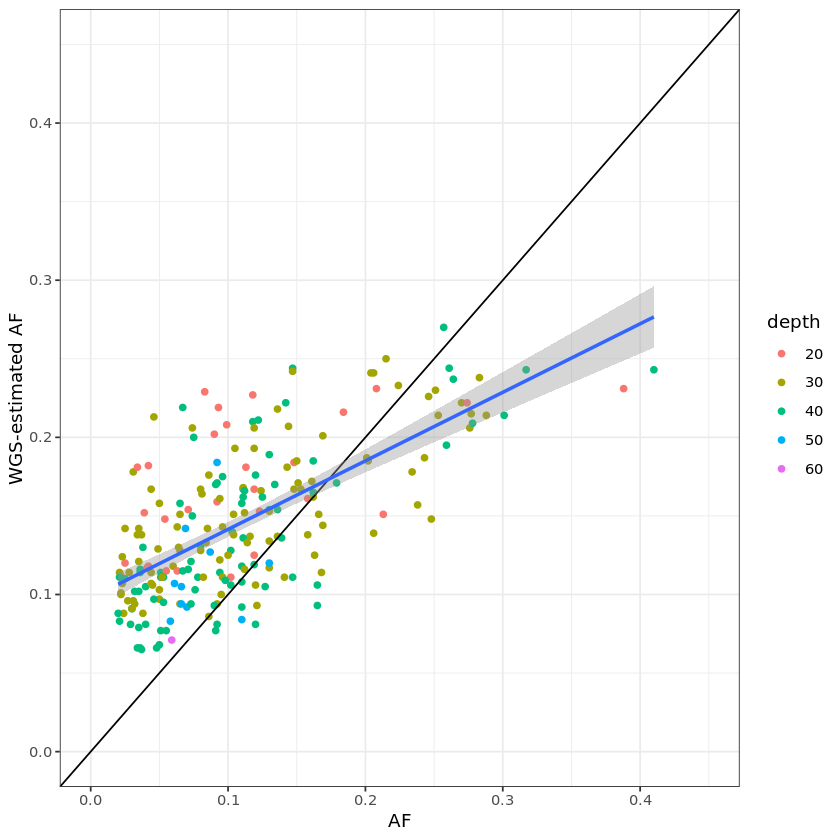

In [43]:
chip_calls_joined_byvariant |>
filter(AF_wgs != 0 & AF_dts != 0) |>
# glimpse() 
ggplot(aes(x = AF_dts, y = AF_wgs)) +
geom_point(aes(color = factor(round(DP_wgs, -1)))) +
geom_abline(slope = 1, intercept = 0) +
# geom_abline(slope = 1, intercept = -0.05, color = 'blue') +
# geom_abline(slope = 1, intercept = 0.05, color = 'blue') +
geom_smooth(method = 'lm') +
theme_bw() +
xlim(c(0, 0.45)) +
ylim(c(0, 0.45)) +
labs(x = 'AF', y = 'WGS-estimated AF', color = 'depth') 

ggsave('AF_dotplot.pdf', height = 4, width = 5)

In [60]:
chip_calls_joined_byvariant |>
filter(AF_wgs != 0 & AF_dts != 0) |>
lm(AF_wgs ~ AF_dts + DP_wgs, data = _) |>
tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.153747666,0.011633237,13.216241,7.282426e-30
AF_dts,0.417069196,0.030659726,13.603161,4.032546e-31
DP_wgs,-0.001609052,0.000314217,-5.120831,6.549295e-07


In [51]:
chip_calls_joined_byvariant |>
filter(AF_wgs != 0 & AF_dts != 0) |>
mutate(AF_dev = abs(AF_dts - AF_wgs)) |>
lm(AF_dev ~ DP_wgs, data = _) |>
tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.094613092,0.0110986657,8.524727,2.243872e-15
DP_wgs,-0.001201419,0.0003244883,-3.702502,2.685752e-04


In [52]:
chip_calls_joined_byvariant |>
filter(AF_wgs != 0 & AF_dts != 0) |>
mutate(AF_dev = (AF_dts - AF_wgs)^2) |>
lm(AF_dev ~ DP_wgs, data = _) |>
tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.0100825939,1.585913e-03,6.357594,1.127589e-09
DP_wgs,-0.0001743118,4.636687e-05,-3.759403,2.171301e-04


# sens/spec/PPV/NPV by mutation

In [ ]:
chip_calls_dts |>
full_join(chip_calls_wgs, 
          by = join_by(GRID, 
                       chip_gene_dts == chip_gene_wgs,
                       chip_mut_aachange_dts == chip_mut_aachange_wgs)) |>
glimpse() |>
transmute(
    GRID,
    chip_gene = replace_na(chip_gene_dts, 'none'),
    chip_mut_aachange = replace_na(chip_mut_aachange_dts, 'none'),
    AF_dts,
    AF_wgs,
    DP_wgs
) |>
mutate(
    AF_dts = replace_na(AF_dts, 0),
    AF_wgs = replace_na(AF_wgs, 0)
) |>
glimpse() ->
chip_calls_combined

In [ ]:
chip_calls_combined |>
group_by(
    AF_range_dts = cut(AF_dts, c(0, 0.02, 0.05, 0.1, 0.3, 0.45, 0.55, 1), right = FALSE),
    has_chip_wgs = AF_wgs != 0
) |>
summarise(n = n(), .groups = 'keep') |>
pivot_wider(names_from = has_chip_wgs, names_prefix = 'wgs_CHIP_', values_from = n) |>
mutate(
    wgs_CHIP_TRUE = replace_na(wgs_CHIP_TRUE, 0),
    num_people = (wgs_CHIP_TRUE + wgs_CHIP_FALSE),
    pos_rate = round(100*wgs_CHIP_TRUE / num_people),
    neg_rate = 100 - pos_rate
) |>
select(
    `AF range` = AF_range_dts,
    `num. people` = num_people,
    `CHIP positive` = wgs_CHIP_TRUE,
    `CHIP negative` = wgs_CHIP_FALSE,
    `WGS pos. rate` = pos_rate,
    `WGS neg. rate` = neg_rate
) ->
sensspec_df

In [ ]:
sensspec_df

In [ ]:
chip_calls_combined |>
group_by(
    AF_range_wgs = cut(AF_wgs, c(0, 0.02, 0.05, 0.1, 0.3, 0.45, 0.55, 1), right = FALSE),
    has_chip_dts = AF_dts != 0
) |>
summarise(n = n(), .groups = 'keep') |>
pivot_wider(names_from = has_chip_dts, names_prefix = 'dts_CHIP_', values_from = n) |>
mutate(
    dts_CHIP_TRUE = replace_na(dts_CHIP_TRUE, 0),
    num_people = (dts_CHIP_TRUE + dts_CHIP_FALSE),
    predictive_value = round(100 * dts_CHIP_TRUE / num_people),
    other_pv = 100 - predictive_value
) |>
select(
    `AF range` = AF_range_wgs,
    `num. people` = num_people,
    `CHIP positive` = dts_CHIP_TRUE,
    `CHIP negative` = dts_CHIP_FALSE,
    `pos. pred. value` = predictive_value,
    `neg. pred. value` = other_pv
) ->
predvalue_df

In [ ]:
predvalue_df

In [ ]:
chip_calls_combined |>
filter(AF_wgs != 0) |>
ggplot(mapping = aes(x = AF_dts, y = AF_wgs)) +
geom_point() +
theme_bw() ->
p

ggMarginal(p, type="histogram")

In [ ]:
chip_calls_combined |>
filter(AF_dts != 0) |>
ggplot(mapping = aes(x = AF_dts, y = AF_wgs)) +
geom_point() +
theme_bw() ->
p

ggMarginal(p, type="histogram")

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 5)

chip_calls_combined |>
filter(AF_wgs != 0 & AF_dts != 0) |>
glimpse() |>
ggplot(mapping = aes(x = AF_dts, y = AF_wgs, color = factor(10*round(DP_wgs/10)))) +
geom_point() +
geom_abline(slope = 1, intercept = 0) +
geom_abline(slope = 1, intercept = -0.05, color = 'blue') +
geom_abline(slope = 1, intercept = 0.05, color = 'blue') +
theme_bw() +
xlim(c(0, 0.45)) +
ylim(c(0, 0.45)) +
labs(x = 'AF', y = 'WGS-estimated AF', color = 'depth') 

ggsave(filename = 'figA.pdf', height = 5, width = 8)

In [ ]:
chip_calls_combined |>
filter(AF_wgs != 0 & AF_dts != 0) |>
mutate(AF_dev = abs(AF_dts - AF_wgs)) |>
lm(AF_dev ~ DP_wgs, data = _) |>
tidy()

In [ ]:
chip_calls_combined |>
filter(AF_wgs != 0 & AF_dts != 0) |>
mutate(AF_dev = (AF_dts - AF_wgs)^2) |>
lm(AF_dev ~ DP_wgs, data = _) |>
tidy()

In [ ]:
# chip_calls_combined |>
# filter(AF_wgs != 0 & AF_dts != 0) |>
# mutate(AF_dev = (AF_dts - AF_wgs)) |>
# dglm(formula = AF_dev ~ AF_dts + DP_wgs, 
#      dformula = ~ AF_dts + DP_wgs,
#      data = _) ->
# dg_fit

In [ ]:
# tidy(dg_fit)
# tidy(dg_fit$dispersion.fit)

# deprecated - calibrating binom cutoff

In [ ]:
demog_agd_199k |> 
select(GRID, age = age_at_biosample) |>
mutate(decade = round(age, -1)) |>
filter(between(decade, 40, 90)) |>
inner_join(dts_chip_by_person, by = 'GRID') |>
inner_join(
    wgs_chip_calls |>
    filter_wgs_chip_calls(max_binom_p = 0.5) |>
    transmute(GRID, has_chip_binom_05 = has_chip_wgs),
    by = 'GRID') |>
inner_join(
    wgs_chip_calls |>
    filter_wgs_chip_calls(max_binom_p = 0.1) |>
    transmute(GRID, has_chip_binom_01 = has_chip_wgs),
    by = 'GRID') |>
inner_join(
    wgs_chip_calls |>
    filter_wgs_chip_calls(max_binom_p = 0.05) |>
    transmute(GRID, has_chip_binom_005 = has_chip_wgs),
    by = 'GRID') |>
inner_join(
    wgs_chip_calls |>
    filter_wgs_chip_calls(max_binom_p = 0.01) |>
    transmute(GRID, has_chip_binom_001 = has_chip_wgs),
    by = 'GRID') |>
inner_join(
    wgs_chip_calls |>
    filter_wgs_chip_calls(max_binom_p = 0.001) |>
    transmute(GRID, has_chip_binom_0001 = has_chip_wgs),
    by = 'GRID') |>
glimpse() ->
age_binom_dependence

In [ ]:
-log10(wgs_chip_calls$binom_p_val) |> hist()

In [ ]:
cut(-log10(c(1, 0.1, 0.01, 0.001)), c(0, 1, 2, 3, 4), right = FALSE)

In [ ]:
?cut

In [ ]:
# TODO figure otu how to do this right
demog_agd_199k |> 
select(GRID, age = age_at_biosample) |>
inner_join(chip_calls_collapsed_dts, by = 'GRID') |>
full_join(
    wgs_chip_calls,
    by = 'GRID',
    relationship = "many-to-many"
) |>
filter(!is.na(binom_p_val)) |>
mutate(
    log10_p = pmax(0, -log10(binom_p_val)),
    binom_p_range = cut(log10_p, c(0, 1, 2, 3, 4, 5, Inf), right = FALSE),
    decade = round(age, -1)
) |>
# filter(is.na(binom_p_range))
# glimpse()
# ggplot(aes(x = age, y = -log10(binom_p_val), color = is.na(chip_gene_dts))) + geom_point(alpha = 0.5)
group_by(
    binom_p_range, decade    
) |>
summarise(
    num_pos = sum(!is.na(chip_gene_dts)),
    pos_rate = mean(!is.na(chip_gene_dts)),
    num_here = n(),
    .groups = 'keep') |>
filter(between(decade, 40, 90)) |>
arrange(pos_rate)
ggplot(aes(x = decade, y = binom_p_range, fill = pos_rate)) +
geom_tile() +
geom_label(aes(label = paste0(num_pos, '/', num_here, '\n=', round(100*pos_rate))), fill = 'white')

In [ ]:
glimpse(age_binom_dependence)

In [ ]:
age_binom_dependence |>
pivot_longer(cols = starts_with('has_chip_binom'), 
             names_to = 'binom_cutoff',
             values_to = 'has_chip_wgs') |>
group_by(decade, binom_cutoff) |>
summarize(
    TP = sum(has_chip_dts == TRUE & has_chip_wgs == TRUE),
    FP = sum(has_chip_dts == FALSE & has_chip_wgs == TRUE),
    TN = sum(has_chip_dts == FALSE & has_chip_wgs == FALSE),
    FN = sum(has_chip_dts == TRUE & has_chip_wgs == FALSE),
    sensitivity = TP / (TP + FN),
    specificity = TN / (TN + FP),
    .groups = 'drop'
) |>
glimpse() ->
sens_spec_by_decade_binom

In [ ]:
sens_spec_by_decade_binom |>
ggplot(aes(x = 1 - specificity, y = sensitivity,
           color = factor(decade), shape = factor(binom_cutoff))) +
geom_point(size = 4) +
geom_line(aes(group = factor(decade))) +
geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "gray") +
labs(
    title = "ROC Curves by Decade and Binomial Cutoff",
    x = "1 - Specificity",
    y = "Sensitivity",
    color = "Decade"
) +
theme_minimal()

# deprecated - compute sens of WGS by call using DTS as gold standard

In [ ]:
chip_calls_collapsed_dts

In [ ]:
wgs_chip_calls
# TODO: make sens/spec/PPV/NPV for each AF range
# step 1: make TP/FP/TN/FN for each AF range

In [ ]:
chip_calls_collapsed_dts |>
filter(!is.na(chip_gene_dts)) |>
pull(AF_dts) |>
range()

In [ ]:
options(repr.plot.height = 4, repr.plot.width = 15)

In [ ]:
grade_wgs_calls_sens = function(wgs_calls_filtered) {
    
    chip_calls_collapsed_dts |>
    filter(!is.na(chip_gene_dts)) |>
    left_join(
        wgs_calls_filtered,
        by = c('GRID', 
               'chip_gene_dts' = 'chip_gene_wgs',
               'chip_mut_aachange_dts' = 'chip_mut_aachange_wgs')
    )  |>
    filter(chip_gene_dts %in% c('ASXL1', 'DNMT3A', 'TET2')) |>
    group_by(
        wgs_chip = !is.na(AF_wgs),
        chip_gene_dts,
        af_group = cut(AF_dts, breaks = c(0, 0.02, 0.05, 0.1, 0.2, 1), right = FALSE)
    ) |>
    summarise(n = n(), .groups = 'keep') |>
    pivot_wider(names_from = 'wgs_chip', values_from = 'n', names_prefix = 'wgs_chip_') |>
    rename(`true pos.` = wgs_chip_TRUE, `false neg.` = wgs_chip_FALSE)
}

In [ ]:
grade_wgs_calls_spec = function(wgs_calls_filtered) {
    
    chip_calls_collapsed_dts |>
    filter(is.na(chip_gene_dts)) |>
    left_join(
        wgs_calls_filtered,
        by = c('GRID')
#                'chip_gene_dts' = 'chip_gene_wgs',
#                'chip_mut_aachange_dts' = 'chip_mut_aachange_wgs')
    )  |>
#     filter(chip_gene0_dts %in% c('ASXL1', 'DNMT3A', 'TET2')) |>
    group_by(
        wgs_chip = !is.na(AF_wgs),
        chip_gene_dts,
        af_group = cut(AF_dts, breaks = c(0, 0.02, 0.05, 0.1, 0.2, 1), right = FALSE)
    ) |>
    summarise(n = n(), .groups = 'keep') |>
    pivot_wider(names_from = 'wgs_chip', values_from = 'n', names_prefix = 'wgs_chip_') |>
    rename(`false pos.` = wgs_chip_TRUE, `true neg.` = wgs_chip_FALSE)
}

In [ ]:
wgs_chip_calls |>
grade_wgs_calls_sens()

In [ ]:
make_sensitivity_plots = function(wgs_calls_filtered) {

    wgs_calls_filtered |>
    grade_wgs_calls_sens() |>
    mutate(sensitivity = round(100*`true pos.`/(`true pos.` + `false neg.`), 1)) |>
    ggplot(aes(x = af_group, y = sensitivity)) +
    geom_bar(stat = 'identity') +
    facet_wrap(facets = vars(chip_gene_dts)) +
    theme_bw() +
    xlab('AF range')
}

In [ ]:
make_tp_fn_count_plots = function(wgs_calls_filtered) {

    wgs_calls_filtered |>
    grade_wgs_calls_spec() |>
    pivot_longer(cols = c(`false pos.`, `true neg.`)) |>
    ggplot(aes(x = af_group, y = value, fill = name)) +
    geom_bar(stat = 'identity') +
    facet_wrap(facets = vars(chip_gene_dts)) +
    theme_bw() +
    xlab('AF range') +
    theme(legend.title=element_blank(), 
          legend.position = c(0.9, 0.8))
}

In [ ]:
wgs_chip_calls |>
make_sensitivity_plots()

wgs_chip_calls |>
make_tp_fn_count_plots()

In [ ]:
wgs_chip_calls |>
filter(binom_p_val < 0.01) |>
make_sensitivity_plots()

wgs_chip_calls |>
filter(binom_p_val < 0.01) |>
make_tp_fn_count_plots()

In [ ]:
glimpse(wgs_chip_calls)

In [ ]:
wgs_chip_calls |>
make_sensitivity_plots()

wgs_chip_calls |>
filter(depth_gt_10) |>
make_sensitivity_plots()

wgs_chip_calls |>
filter(depth_gt_20) |>
make_sensitivity_plots()

In [ ]:
dts_wgs_to_analyze |>
# filter(!is.na(chip_gene_dts), !is.na(AF_wgs)) |>
ggplot(mapping = aes(x = AF_dts, y = AF_wgs)) +
geom_point() +
xlim(0, 0.7) +
ylim(0, 0.7) +
geom_abline(slope = 1, intercept = 0) +
labs(x = 'AF (deep targeted sequencing)', y = 'AF (whole genome sequencing)') ->
p

ggExtra::ggMarginal(p, type = "histogram")

In [ ]:
dts_wgs_to_analyze |>
filter(!is.na(AF_dts)) |>
group_by(wgs_chip = !is.na(AF_wgs) & AF_wgs != 0) |>
summarise(n = n()) |>
pivot_wider(names_from = 'wgs_chip', values_from = 'n', names_prefix = 'wgs_chip_') |>
mutate(sensitivity = round(100*wgs_chip_TRUE/(wgs_chip_TRUE + wgs_chip_FALSE), 1))

# deprecated - make DTS results table by person (using maxAF)

In [ ]:
dts_chip_calls |>
count(GRID, name = 'num_chip_dts') |>
filter(num_chip_dts > 1) |>
left_join(dts_chip_calls, by = 'GRID') |>
group_by(GRID) |>
summarise(
    chip_gene_dts = chip_gene_dts[which.max(AF_dts)],
    chip_mut_func_dts = chip_mut_func_dts[which.max(AF_dts)],
    chip_mut_exofunc_dts = chip_mut_exofunc_dts[which.max(AF_dts)],
    chip_mut_aachange_dts = chip_mut_aachange_dts[which.max(AF_dts)],
    AF_dts = max(AF_dts)
) ->
dts_multi_chip_summarised

In [ ]:
dts_chip_calls |>
count(GRID, name = 'num_rows_dts') |>
filter(num_rows_dts == 1) |>
left_join(dts_chip_calls, by = 'GRID') |>
mutate(num_chip_dts = ifelse(is.na(chip_gene_dts), 0, 1)) |>
select(-num_rows_dts) |>
bind_rows(dts_multi_chip_summarised) ->
dts_chip_calls_by_person

In [ ]:
glimpse(dts_chip_calls_by_person)

# deprecated - make WGS results table by person (using 15/2/both)

In [ ]:
wgs_chip_calls |>
group_by(GRID) |>
summarise(
    
#     has_chip_wgs_15_1_both = any(depth_gt_15 & second_ad_gt_1 & both_strands, na.rm = TRUE),
#     has_chip_wgs_15_2_both = any(depth_gt_15 & second_ad_gt_1 & both_strands, na.rm = TRUE),
#     has_chip_wgs_15_3_both = any(depth_gt_15 & second_ad_gt_1 & both_strands, na.rm = TRUE),
#     has_chip_wgs_15_4_both = any(depth_gt_15 & second_ad_gt_1 & both_strands, na.rm = TRUE),
#     has_chip_wgs_15_5_both = any(depth_gt_15 & second_ad_gt_1 & both_strands, na.rm = TRUE),
    
#     has_chip_wgs_15_1 = any(depth_gt_15 & second_ad_gt_1, na.rm = TRUE),
    has_chip_wgs_15_2 = any(depth_gt_15 & second_ad_gt_1, na.rm = TRUE),
#     has_chip_wgs_15_3 = any(depth_gt_15 & second_ad_gt_1, na.rm = TRUE),
#     has_chip_wgs_15_4 = any(depth_gt_15 & second_ad_gt_1, na.rm = TRUE),
#     has_chip_wgs_15_5 = any(depth_gt_15 & second_ad_gt_1, na.rm = TRUE),
    
    num_chip_wgs = sum(depth_gt_15 & second_ad_gt_2, na.rm = TRUE),
    
    chip_gene_wgs = ifelse(has_chip_wgs_15_2, chip_gene_wgs[which.max(maxAF_wgs)], NA),
    chip_mut_func_wgs = ifelse(has_chip_wgs_15_2, chip_mut_func_wgs[which.max(maxAF_wgs)], NA),
    chip_mut_exofunc_wgs = ifelse(has_chip_wgs_15_2, chip_mut_exofunc_wgs[which.max(maxAF_wgs)], NA),
    chip_mut_aachange_wgs = ifelse(has_chip_wgs_15_2, chip_mut_aachange_wgs[which.max(maxAF_wgs)], NA),
    AF_wgs = ifelse(has_chip_wgs_15_2, max(maxAF_wgs), NA)) ->
wgs_chip_calls_by_person

# deprecated - compute sens/spec of WGS calls by person

In [ ]:
dts_chip_calls_by_person |> 
select(-biovu_sample_date) |>
full_join(wgs_chip_calls_by_person, by = c('GRID')) |>

filter(is.na(AF_dts) | AF_dts > 0.10) |>
count(has_chip_dts = !is.na(chip_gene_dts), has_chip_wgs_15_2) |>
pivot_wider(names_from = 'has_chip_wgs_15_2', values_from = 'n', names_prefix = 'wgs_chip_') |>
mutate(pr = wgs_chip_TRUE / (wgs_chip_TRUE + wgs_chip_FALSE))

In [ ]:
dts_chip_calls_by_person |> 
select(-biovu_sample_date) |>
full_join(wgs_chip_calls_by_person, 
          by = c('GRID', 
                 'chip_gene_dts' = 'chip_gene_wgs',
                 'chip_mut_aachange_dts' = 'chip_mut_aachange_wgs')) |>
mutate(has_chip_wgs_15_2_both = replace_na(has_chip_wgs_15_2_both, FALSE))

In [ ]:
dts_chip_calls_by_person |> 
select(-biovu_sample_date) |>
full_join(wgs_chip_calls_by_person, 
          by = c('GRID', 
                 'chip_gene_dts' = 'chip_gene_wgs',
                 'chip_mut_aachange_dts' = 'chip_mut_aachange_wgs')) |>
mutate(has_chip_wgs_15_2_both = replace_na(has_chip_wgs_15_2_both, FALSE))

In [ ]:
dts_chip_yesno |>
inner_join(wgs_chip_yesno, by = 'GRID') |>
group_by(has_chip_dts, 
         af_range = cut(maxAF, c(0, 0.02, 0.05, 0.1, 1), include.lowest = TRUE)) |>
summarise(
    .groups = 'drop',
    n = n(), 
    pr_15_1_both = sum(has_chip_wgs_15_1_both)/n()
)

In [ ]:
# wgs_chip_calls_raw |>
# mutate(
#     has_chip_5_1_both   = depth_gt_5 & second_ad_gt_1 & both_strands,
#     has_chip_5_1_either = depth_gt_5 & second_ad_gt_1,
#     has_chip_5_2_both   = depth_gt_5 & second_ad_gt_2 & both_strands,
#     has_chip_5_2_either = depth_gt_5 & second_ad_gt_2,
#     has_chip_5_3_both   = depth_gt_5 & second_ad_gt_3 & both_strands,
#     has_chip_5_3_either = depth_gt_5 & second_ad_gt_3,
#     has_chip_5_4_both   = depth_gt_5 & second_ad_gt_4 & both_strands,
#     has_chip_5_4_either = depth_gt_5 & second_ad_gt_4,
#     has_chip_5_5_both   = depth_gt_5 & second_ad_gt_5 & both_strands,
#     has_chip_5_5_either = depth_gt_5 & second_ad_gt_5,
    
#     has_chip_10_1_both   = depth_gt_10 & second_ad_gt_1 & both_strands,
#     has_chip_10_1_either = depth_gt_10 & second_ad_gt_1,
#     has_chip_10_2_both   = depth_gt_10 & second_ad_gt_2 & both_strands,
#     has_chip_10_2_either = depth_gt_10 & second_ad_gt_2,
#     has_chip_10_3_both   = depth_gt_10 & second_ad_gt_3 & both_strands,
#     has_chip_10_3_either = depth_gt_10 & second_ad_gt_3,
#     has_chip_10_4_both   = depth_gt_10 & second_ad_gt_4 & both_strands,
#     has_chip_10_4_either = depth_gt_10 & second_ad_gt_4,
#     has_chip_10_5_both   = depth_gt_10 & second_ad_gt_5 & both_strands,
#     has_chip_10_5_either = depth_gt_10 & second_ad_gt_5,
    
#     has_chip_15_1_both   = depth_gt_15 & second_ad_gt_1 & both_strands,
#     has_chip_15_1_either = depth_gt_15 & second_ad_gt_1,
#     has_chip_15_2_both   = depth_gt_15 & second_ad_gt_2 & both_strands,
#     has_chip_15_2_either = depth_gt_15 & second_ad_gt_2,
#     has_chip_15_3_both   = depth_gt_15 & second_ad_gt_3 & both_strands,
#     has_chip_15_3_either = depth_gt_15 & second_ad_gt_3,
#     has_chip_15_4_both   = depth_gt_15 & second_ad_gt_4 & both_strands,
#     has_chip_15_4_either = depth_gt_15 & second_ad_gt_4,
#     has_chip_15_5_both   = depth_gt_15 & second_ad_gt_5 & both_strands,
#     has_chip_15_5_either = depth_gt_15 & second_ad_gt_5,
    
#     has_chip_20_1_both   = depth_gt_20 & second_ad_gt_1 & both_strands,
#     has_chip_20_1_either = depth_gt_20 & second_ad_gt_1,
#     has_chip_20_2_both   = depth_gt_20 & second_ad_gt_2 & both_strands,
#     has_chip_20_2_either = depth_gt_20 & second_ad_gt_2,
#     has_chip_20_3_both   = depth_gt_20 & second_ad_gt_3 & both_strands,
#     has_chip_20_3_either = depth_gt_20 & second_ad_gt_3,
#     has_chip_20_4_both   = depth_gt_20 & second_ad_gt_4 & both_strands,
#     has_chip_20_4_either = depth_gt_20 & second_ad_gt_4,
#     has_chip_20_5_both   = depth_gt_20 & second_ad_gt_5 & both_strands,
#     has_chip_20_5_either = depth_gt_20 & second_ad_gt_5,
    
#     has_chip_25_1_both   = depth_gt_25 & second_ad_gt_1 & both_strands,
#     has_chip_25_1_either = depth_gt_25 & second_ad_gt_1,
#     has_chip_25_2_both   = depth_gt_25 & second_ad_gt_2 & both_strands,
#     has_chip_25_2_either = depth_gt_25 & second_ad_gt_2,
#     has_chip_25_3_both   = depth_gt_25 & second_ad_gt_3 & both_strands,
#     has_chip_25_3_either = depth_gt_25 & second_ad_gt_3,
#     has_chip_25_4_both   = depth_gt_25 & second_ad_gt_4 & both_strands,
#     has_chip_25_4_either = depth_gt_25 & second_ad_gt_4,
#     has_chip_25_5_both   = depth_gt_25 & second_ad_gt_5 & both_strands,
#     has_chip_25_5_either = depth_gt_25 & second_ad_gt_5    
# ) |>
# select(-(depth_gt_5:gene_hemeca_p)) |>
# glimpse() ->
# wgs_chip_calls

# deprecated - combine gold-standard and WGS to compare

In [ ]:
# inner_join(
#     wgs_wide,
#     gold_standard,
#     by = 'person_id',
#     suffix = c('_wgs', '_gs')
# ) |>
# glimpse() ->
# to_compare

In [ ]:
mean(to_compare$any_gs_chip)

In [ ]:
to_compare |>
group_by(any_wgs_chip, any_gs_chip) |>
summarise(n = n(), .groups = 'drop') ->
confusion_tbl

In [ ]:
confusion_tbl |>
 summarise(
   sensitivity = n[4] / sum(n[c(2,4)]),
   specificity = n[1] / sum(n[c(1,3)]),
   ppv = n[4] / sum(n[c(3,4)]),
   npv = n[1] / sum(n[c(1,2)])
 )

# deprecated - optimize filters

In [ ]:
grade_wgs_calls_byperson <- function(wgs_calls, 
                                     min_dp, 
                                     min_ad2,
                                     require_both_strands,
                                     max_age_p,
                                     max_tert_p,
                                     max_binom_p) {

    dts_chip_by_person |>
    inner_join(wgs_calls, by = 'GRID') |>
    count(has_chip_dts, has_chip_wgs) -> 
    wgs_vs_dts

    # Extract counts
    TP <- wgs_vs_dts |> filter(has_chip_dts == TRUE, has_chip_wgs == TRUE) |> pull(n)
    TN <- wgs_vs_dts |> filter(has_chip_dts == FALSE, has_chip_wgs == FALSE) |> pull(n)
    FP <- wgs_vs_dts |> filter(has_chip_dts == FALSE, has_chip_wgs == TRUE) |> pull(n)
    FN <- wgs_vs_dts |> filter(has_chip_dts == TRUE, has_chip_wgs == FALSE) |> pull(n)
    
    # Calculate metrics (with error handling for division by zero)
    sensitivity <- TP / (TP + FN)
    specificity <- TN / (TN + FP)
    PPV         <- TP / (TP + FP)
    NPV         <- TN / (TN + FN)

    # Create a results data frame with filter parameters
    tibble(
        min_dp = min_dp,
        min_ad2 = min_ad2,
        require_both_strands = require_both_strands,
        max_age_p = max_age_p,
        max_tert_p = max_tert_p,
        max_binom_p = max_binom_p,
        TP = TP,
        TN = TN,
        FP = FP,
        FN = FN,
        sensitivity = sensitivity,
        specificity = specificity,
        PPV = PPV,
        NPV = NPV
    )
}

In [ ]:
evaluate_filter_combinations <- function(data,
                                         filter_df = ) {
    
    results <- tibble()
    
    total_combinations <- nrow(filter_params)
    cat("Evaluating", total_combinations, "filter combinations\n")
    pb <- txtProgressBar(min = 0, max = total_combinations, style = 3)
    
    for(i in 1:total_combinations) {
        
        filtered_data <- do.call(
            filter_wgs_chip_calls,
            c(list(data = data), as.list(filter_params[i, ]))
        )
        
        metrics <- do.call(
            grade_wgs_calls_byperson,
            c(list(wgs_calls = filtered_data), as.list(filter_params[i, ]))
        )
        
        results <- bind_rows(results, metrics)
        
        setTxtProgressBar(pb, i)
    }
    
    close(pb)
    return(results)
}

In [ ]:
wgs_chip_calls |>
evaluate_filter_combinations()

In [ ]:
# Define the parameter combinations to try
filter_params <- expand_grid(
    min_dp = c(10, 15, 20, 25),
    min_ad2 = c(1, 2, 3, 4),
    require_both_strands = c(TRUE, FALSE),
    max_tert_p = c(0.1, 0.01, 0.001),
    max_age_p = c(0.1, 0.01, 0.001),
    max_binom_p = c(0.1, 0.01, 0.001)
)

In [ ]:
filter_params |>
evaluate_filter_combinations(wgs_chip_calls) ->
evals_of_filters

In [ ]:
evals_of_filters |>
filter(min_dp == 20, min_ad2 == 2, require_both_strands,
       max_tert_p == 0.1, max_age_p == 0.1, max_binom_p == 0.01) |>
glimpse()

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)

In [ ]:
evals_of_filters |>
# filter(min_dp == 20, min_ad2 == 2) |>
ggplot(mapping = aes(x = 1-specificity, y = sensitivity, 
                     color = factor(min_dp), 
                     shape = factor(require_both_strands))) +
geom_point()

In [ ]:
# View the results
evals_of_filters |> 
arrange(desc(sensitivity + specificity)) |>  # Sort by sum of sensitivity and specificity
glimpse()

In [ ]:
lm(formula = sensitivity ~ min_dp + min_ad2 + require_both_strands + max_age_p + max_tert_p + max_binom_p,
   data = filter_evaluation_results) |>
tidy()

# deprecated - set up loop over filters to find sens/spec with/without various filters

In [ ]:
calculate_metrics <- function(wgs_filtered, gold_data) {

    wgs_filtered |>
    right_join(demog, by = 'SAMPLE_ID') |>
    group_by(person_id, wgs_chip_gene) |>
    summarise(AF = median(AF), .groups = "drop") |>
    pivot_wider(
        id_cols = person_id,
        names_from = wgs_chip_gene,
        values_from = AF,
        values_fill = 0
    ) |>
    select(-`NA`) |>
    mutate(any_wgs_chip = if_any(-person_id, ~.!=0)) |>
    inner_join(
        gold_data,
        by = 'person_id',
        suffix = c('_wgs', '_gs')
    )  |>
    group_by(any_wgs_chip, any_gs_chip) |>
    summarise(n = n(), .groups = "drop") |>
    summarise(
        sensitivity = n[4] / sum(n[c(2,4)]),
        specificity = n[1] / sum(n[c(1,3)]),
        ppv = n[4] / sum(n[c(3,4)]),
        npv = n[1] / sum(n[c(1,2)])
    )
}

In [ ]:
filters <- list(
   depth_0__second_ad_0__strands_0 = quo(TRUE),
   depth_0__second_ad_1__strands_0 = quo(second_ad_gt_1),
   depth_0__second_ad_2__strands_0 = quo(second_ad_gt_2),
   depth_0__second_ad_3__strands_0 = quo(second_ad_gt_3),
   depth_0__second_ad_0__strands_1 = quo(both_strands),
   depth_0__second_ad_1__strands_1 = quo(second_ad_gt_1 & both_strands),
   depth_0__second_ad_2__strands_1 = quo(second_ad_gt_2 & both_strands),
   depth_0__second_ad_3__strands_1 = quo(second_ad_gt_3 & both_strands),
   depth_5__second_ad_0__strands_0 = quo(depth_gt_5),
   depth_5__second_ad_1__strands_0 = quo(depth_gt_5 & second_ad_gt_1),
   depth_5__second_ad_2__strands_0 = quo(depth_gt_5 & second_ad_gt_2),
   depth_5__second_ad_3__strands_0 = quo(depth_gt_5 & second_ad_gt_3),
   depth_5__second_ad_0__strands_1 = quo(depth_gt_5 & both_strands),
   depth_5__second_ad_1__strands_1 = quo(depth_gt_5 & second_ad_gt_1 & both_strands),
   depth_5__second_ad_2__strands_1 = quo(depth_gt_5 & second_ad_gt_2 & both_strands),
   depth_5__second_ad_3__strands_1 = quo(depth_gt_5 & second_ad_gt_3 & both_strands),
   depth_15__second_ad_0__strands_0 = quo(depth_gt_15),
   depth_15__second_ad_1__strands_0 = quo(depth_gt_15 & second_ad_gt_1),
   depth_15__second_ad_2__strands_0 = quo(depth_gt_15 & second_ad_gt_2),
   depth_15__second_ad_3__strands_0 = quo(depth_gt_15 & second_ad_gt_3),
   depth_15__second_ad_0__strands_1 = quo(depth_gt_15 & both_strands),
   depth_15__second_ad_1__strands_1 = quo(depth_gt_15 & second_ad_gt_1 & both_strands),
   depth_15__second_ad_2__strands_1 = quo(depth_gt_15 & second_ad_gt_2 & both_strands),
   depth_15__second_ad_3__strands_1 = quo(depth_gt_15 & second_ad_gt_3 & both_strands),
   depth_25__second_ad_0__strands_0 = quo(depth_gt_25),
   depth_25__second_ad_1__strands_0 = quo(depth_gt_25 & second_ad_gt_1),
   depth_25__second_ad_2__strands_0 = quo(depth_gt_25 & second_ad_gt_2),
   depth_25__second_ad_3__strands_0 = quo(depth_gt_25 & second_ad_gt_3),
   depth_25__second_ad_0__strands_1 = quo(depth_gt_25 & both_strands),
   depth_25__second_ad_1__strands_1 = quo(depth_gt_25 & second_ad_gt_1 & both_strands),
   depth_25__second_ad_2__strands_1 = quo(depth_gt_25 & second_ad_gt_2 & both_strands),
   depth_25__second_ad_3__strands_1 = quo(depth_gt_25 & second_ad_gt_3 & both_strands)
)

In [ ]:
map_dfr(filters, ~{
    wgs_pre_calls |>
    filter(!!.x) |>
    calculate_metrics(gold_standard)
}, .id = "filter_set") ->
sens_spec_metrics

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 5)

In [ ]:
sens_spec_metrics |>
separate(
    col = 'filter_set',
    into = c('depth', 'allele_depth', 'both_strands'),
    sep = '__') |>
mutate(depth = factor(str_split_i(depth, '_', 2), levels = c('0', '5', '10', '15', '20', '25'))) |>
mutate(allele_depth = factor(str_split_i(allele_depth, '_', 3))) |>
mutate(both_strands = str_split_i(both_strands, '_', 2)) ->
sensspec_to_plot

In [ ]:
# sensspec_to_plot

In [ ]:
sensspec_to_plot |>
ggplot(mapping = aes(x = 1-specificity, y = sensitivity)) +
geom_point(aes(color = allele_depth, shape = both_strands), size = 5, alpha = 0.5) +
# geom_line(aes(group = allele_depth, color = allele_depth), alpha = 0.5, linewidth = 2) +
facet_wrap(facets = vars(depth)) +
theme_bw() +
labs(title = 'Sensitivity and Specificity of WGS-based CHIP calling',
     subtitle = 'Comparison of WGS filtering strategies'
#      caption = paste(
#          'Total number of reads, shown in the title of each facet, has weak influence on the sensitivity and specificity',
#          'of calls up to the cutoff of 25 reads (bottom right) which decreases sensitivity by ~5% and',
#          'increases specificity by ~1%. Filtering based on the number of reads of the less common allele,',
#          'shown in the color of each point, exerted a strong effect on sensitivity and specificty. Using a cutoff',
#          'of one read (green) had no effect on sensitivity or specificity, but filtering on two or three reads markedly',
#          'decreased sensitivity and increased specificity. Filtering based on the presence of reads from both alleles on both DNA',
#          'strands, shown by the shape of each point, conferred a moderate decrease in sensitivity and increase in specificity.',
#          sep = '\n'
     ) +
theme(plot.caption = element_text(hjust = 0))

In [ ]:
filters <- list(
    base = quo(TRUE),
    both_strands = quo(both_strands),
    multi_allelic = quo(multi_allelic)
)

map_dfr(filters, ~{
    wgs_pre_calls |>
    filter(!!.x) |>
    calculate_metrics(gold_standard)
}, .id = "filter_set")

In [ ]:
to_compare |> glimpse()

In [ ]:
glimpse(wgs_pre_calls)

In [ ]:
wgs_pre_calls |>
right_join(demog, by = 'SAMPLE_ID') |>
group_by(person_id, wgs_chip_gene) |>
summarise(
    AF = max(AF), 
    both_strands = any(second_ad_gt_2),
    .groups = "drop") |>
pivot_wider(
    id_cols = person_id,
    names_from = wgs_chip_gene,
    values_from = c(AF, both_strands),
    values_fill = list(AF = 0, both_strands = FALSE)
) |>
select(-AF_NA, -both_strands_NA) |>
mutate(any_wgs_chip = if_any(-person_id, ~.!=0)) |>
glimpse() ->
wgs_wide

inner_join(
    wgs_wide,
    gold_standard,
    by = 'person_id',
    suffix = c('_wgs', '_gs')
) |>
glimpse() ->
to_compare

In [ ]:
to_compare |>
ggplot(aes(x = DNMT3A, y = AF_DNMT3A, color = both_strands_DNMT3A)) +
geom_point() +
labs(title = 'DNMT3A WGS validation', 
     x = 'deep targeted sequencing', y = 'WGS', color = 'minor allele > 2') +
theme_bw()

In [ ]:
to_compare |>
group_by(AF_range = cut(DNMT3A, c(0, 0.02, 0.05, 0.1, 0.15, 0.2, 1))) |>
summarise(
    n = n(),
    pos = sum(AF_DNMT3A > 0.02),
    sens = mean(AF_DNMT3A > 0.02)) |>
ggplot(mapping = aes(x = AF_range, y = sens)) +
geom_bar(stat = 'identity') +
labs(title = 'WGS sensitivity for DNMT3A CHIP') +
theme_bw()

In [ ]:
to_compare |>
group_by(AF_range = cut(TET2, c(0, 0.02, 0.05, 0.1, 0.15, 0.2, 1))) |>
summarise(
    n = n(),
    pos = sum(AF_TET2 > 0.02),
    sens = mean(AF_TET2 > 0.02)) |>
ggplot(mapping = aes(x = AF_range, y = sens)) +
geom_bar(stat = 'identity') +
labs(title = 'WGS sensitivity for TET2 CHIP') +
theme_bw()